# Vehicle Price Prediction - Internship Project

The goal of this project is to build a regression model to accurately predict the price of used vehicles based on their features like manufacturer, year, body, etc. reading.

## Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform
import re

## Data Overview

- Importing csv

In [247]:
data = pd.read_csv("dataset.csv")

In [248]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [249]:
data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


- Shape

In [250]:
shape = data.shape
print(f"No of rows {shape[0]}")
print(f"No of cols {shape[1]}")

No of rows 1002
No of cols 17


- Info

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [252]:
data.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


- Columns name

In [253]:
list(data.columns)

['name',
 'description',
 'make',
 'model',
 'year',
 'price',
 'engine',
 'cylinders',
 'fuel',
 'mileage',
 'transmission',
 'trim',
 'body',
 'doors',
 'exterior_color',
 'interior_color',
 'drivetrain']

- How many nan values are their in each column

In [254]:
data.isna().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

- Every Category in each feature

In [255]:
print("Drive Train: ", list(data['drivetrain'].unique()))
print("Makers Names: ", list(data['make'].unique()))
print("Cylinders: ", list(data['cylinders'].unique()))
print("Fuel Types: ", list(data['fuel'].unique()))
print("cars Body Type: ", list(data['body'].unique()))
print("No. of Doors: ", list(data['doors'].unique()))

Drive Train:  ['Four-wheel Drive', 'All-wheel Drive', 'Rear-wheel Drive', 'Front-wheel Drive']
Makers Names:  ['Jeep', 'GMC', 'Dodge', 'RAM', 'Nissan', 'Ford', 'Hyundai', 'Chevrolet', 'Volkswagen', 'Chrysler', 'Kia', 'Mazda', 'Acura', 'Subaru', 'Audi', 'BMW', 'Toyota', 'Buick', 'Mercedes-Benz', 'Honda', 'Lincoln', 'Cadillac', 'INFINITI', 'Lexus', 'Land Rover', 'Volvo', 'Genesis', 'Jaguar']
Cylinders:  [np.float64(6.0), np.float64(8.0), np.float64(4.0), np.float64(nan), np.float64(3.0), np.float64(0.0)]
Fuel Types:  ['Gasoline', 'Diesel', 'Hybrid', 'Electric', 'E85 Flex Fuel', 'PHEV Hybrid Fuel', nan, 'Diesel (B20 capable)']
cars Body Type:  ['SUV', 'Pickup Truck', 'Sedan', 'Passenger Van', 'Cargo Van', nan, 'Hatchback', 'Convertible', 'Minivan']
No. of Doors:  [np.float64(4.0), np.float64(3.0), np.float64(nan), np.float64(2.0), np.float64(5.0)]


**Note:** You will see nan values in category is it because it is not yet cleaned

## Data Cleaning

### Data Droping and Imputation

1. Delete name and description column

In [256]:
cleanedData = data.drop(['name', 'description'], axis=1)
cleanedData.head(2)

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive


Name column is to be deleted because the same data are already present in year, make, model, trim columns

2. Remove nan values from price

In [257]:
cleanedData.dropna(subset=['price'], inplace=True)

3. Remove nan values from engine

In [258]:
cleanedData[cleanedData['engine'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
614,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
803,Jeep,Wagoneer,2024,73999.0,NaN,6.0,Gasoline,59.0,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive


In [259]:
cleanedData.loc[(cleanedData['make'] == "Honda") & (cleanedData['model'] == "CR-V Hybrid")][:3]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
109,Honda,CR-V Hybrid,2024,42005.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport Touring,SUV,4.0,Radiant Red Metallic,Black,All-wheel Drive
304,Honda,CR-V Hybrid,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
534,Honda,CR-V Hybrid,2024,40355.0,16V GDI DOHC Hybrid,4.0,Hybrid,68.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,Black,All-wheel Drive


In [260]:
cleanedData[(cleanedData['make'] == "Jeep") & (cleanedData['model'] == "Wagoneer")& (cleanedData['trim'] == "Series II")][:3]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
250,Jeep,Wagoneer,2024,87488.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,22.0,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Global Black,Four-wheel Drive
261,Jeep,Wagoneer,2024,72908.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Diamond Black,Black,Four-wheel Drive


**Note:** As we can see from above rows containing nan values can be filled by locating similar type of models and makers, and here they both containing same engine as founded
1. `Honda` with `CR-V Hybrid` have `16V GDI DOHC Hybrid` engine and doors `4.0`.
2. `Jeep` with `Wagoneer` have `24V GDI DOHC Twin Turbo` engine.

In [261]:
cleanedData.loc[614,'engine'] = "16V GDI DOHC Hybrid"
cleanedData.loc[614,'doors'] = np.float64(4.0)
cleanedData.loc[803,'engine'] = "24V GDI DOHC Twin Turbo"

In [262]:
cleanedData.isna().sum()

make                0
model               0
year                0
price               0
engine              0
cylinders         102
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               6
exterior_color      5
interior_color     37
drivetrain          0
dtype: int64

4. Remove nan values from transmission

In [263]:
cleanedData[cleanedData['transmission'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
725,Mercedes-Benz,EQS 450,2024,111245.0,c,NaN,Electric,10.0,NaN,Base 4MATIC,Sedan,4.0,White,Black,All-wheel Drive
940,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,NaN,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive


In [264]:
cleanedData[(cleanedData['make'] == "Ford") & (cleanedData['model'] == "Transit-350") & (cleanedData['engine'] == "24V GDI DOHC Twin Turbo")]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
793,Ford,Transit-350,2023,57000.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5581.0,10-Speed Automatic,Base,Cargo Van,3.0,White,Gray,Rear-wheel Drive
805,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [265]:
cleanedData[(cleanedData['make'] == "Mercedes-Benz") & (cleanedData['model'] == "EQS 450") & (cleanedData['body'] == "Sedan")]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
253,Mercedes-Benz,EQS 450,2024,110395.0,c,NaN,Electric,5.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
484,Mercedes-Benz,EQS 450,2024,117985.0,c,NaN,Electric,1.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
725,Mercedes-Benz,EQS 450,2024,111245.0,c,NaN,Electric,10.0,NaN,Base 4MATIC,Sedan,4.0,White,Black,All-wheel Drive


**Note:** Same approach is used here looking at the same make, model, engine or body we can find same cars
1. `Mercedes-Benz` of model `EQS 450` and body `Sedan` have transmission `Automatic`
2. `Ford` of model `Transit-350` and engine `24V GDI DOHC Twin Turbo` have transmission `10-Speed Automatic`

In [266]:
cleanedData.loc[725,'transmission'] = "Automatic"
cleanedData.loc[940,'transmission'] = "10-Speed Automatic"

In [267]:
cleanedData.isna().sum()

make                0
model               0
year                0
price               0
engine              0
cylinders         102
fuel                7
mileage            34
transmission        0
trim                1
body                3
doors               6
exterior_color      5
interior_color     37
drivetrain          0
dtype: int64

5. Remove nan values from trim

In [268]:
cleanedData[cleanedData['trim'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
805,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [269]:
cleanedData[(cleanedData['make'] == "Ford") & (cleanedData['model'] == "Transit-350") & (cleanedData['engine'] == "24V GDI DOHC Twin Turbo")]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
793,Ford,Transit-350,2023,57000.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5581.0,10-Speed Automatic,Base,Cargo Van,3.0,White,Gray,Rear-wheel Drive
805,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [270]:
cleanedData.loc[805,'trim'] = "base"

In [271]:
cleanedData.isna().sum()

make                0
model               0
year                0
price               0
engine              0
cylinders         102
fuel                7
mileage            34
transmission        0
trim                0
body                3
doors               6
exterior_color      5
interior_color     37
drivetrain          0
dtype: int64

6. Remove nan values from body

In [272]:
cleanedData[cleanedData['body'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
164,Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive
687,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive


In [273]:
cleanedData[(cleanedData['make'] == "INFINITI") & (cleanedData['model'] == "QX50")][:3]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
167,INFINITI,QX50,2024,48350.0,"o 2L I-4 port/direct injection, DOHC, variable...",4.0,Gasoline,3.0,Variable,LUXE,SUV,4.0,Slate Gray,Pebble Gray,Front-wheel Drive
335,INFINITI,QX50,2024,45055.0,"o 2L I-4 port/direct injection, DOHC, variable...",4.0,Gasoline,25.0,Variable,LUXE,SUV,4.0,Black Obsidian,Pebble Gray,Front-wheel Drive
687,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive


In [274]:
cleanedData[(cleanedData['make'] == "Dodge") & (cleanedData['model'] == "Hornet") & (cleanedData['engine'] == "4 gasoline direct injection, DOHC, Multiair variable valv")][:3]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
55,Dodge,Hornet,2024,42855.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,SUV,4.0,8 Ball,Black,All-wheel Drive
164,Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive


In [275]:
cleanedData.loc[164,'body'] = "SUV"
cleanedData.loc[235,'body'] = "SUV"
cleanedData.loc[687,'body'] = "SUV"

In [276]:
cleanedData.isna().sum()

make                0
model               0
year                0
price               0
engine              0
cylinders         102
fuel                7
mileage            34
transmission        0
trim                0
body                0
doors               6
exterior_color      5
interior_color     37
drivetrain          0
dtype: int64

7. Remove nan values from fuel

In [277]:
cleanedData[cleanedData['fuel'].isna()]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
128,Subaru,Solterra,2024,39934.0,c,NaN,NaN,5.0,1-Speed Automatic,Premium,SUV,4.0,Galactic,Black,All-wheel Drive
219,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,BX,Gray,All-wheel Drive
315,Honda,Prologue,2024,56550.0,c,NaN,NaN,1.0,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
489,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Pearl,Black,All-wheel Drive
490,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
610,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,NaN,NaN,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
726,Jaguar,I-PACE,2024,77053.0,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...,NaN,NaN,8.0,Automatic,EV400 R-Dynamic HSE,SUV,5.0,Santorini Black,Ebony,All-wheel Drive


In [278]:
cleanedData['fuel'].value_counts()

fuel
Gasoline                647
Hybrid                  135
Electric                 96
Diesel                   72
PHEV Hybrid Fuel         16
E85 Flex Fuel             5
Diesel (B20 capable)      1
Name: count, dtype: int64

**Note:** Generally all cars have fuel type gasoline so we are going to replace all nan value with `Gasoline`

In [279]:
cleanedData.fillna({'fuel':"Gasoline"},inplace=True)

8. Remove nan values from doors

In [280]:
cleanedData['doors'].value_counts()

doors
4.0    926
3.0     37
2.0      9
5.0      1
Name: count, dtype: int64

- Generally every car comes with 4 doors so nan values in doors columns are going to fill with 4

In [281]:
cleanedData.fillna({'doors':4},inplace=True)

In [282]:
cleanedData.isna().sum()

make                0
model               0
year                0
price               0
engine              0
cylinders         102
fuel                0
mileage            34
transmission        0
trim                0
body                0
doors               0
exterior_color      5
interior_color     37
drivetrain          0
dtype: int64

9. Remove nan values from exterior_colors

In [283]:
cleanedData[cleanedData['exterior_color'].isna()][:3]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
117,Jeep,Wrangler,2024,59456.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,15.0,Automatic,4-Door Sahara 4x4,SUV,4.0,NaN,Black,Four-wheel Drive
137,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,NaN,NaN,All-wheel Drive
373,Mercedes-Benz,EQS 450,2024,114850.0,c,NaN,Electric,8.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,NaN,Black,All-wheel Drive


In [284]:
cleanedData['exterior_color'].value_counts()

exterior_color
Bright White Clearcoat       80
Black                        31
White                        29
Gray                         25
Summit White                 25
                             ..
Aspen White / Super Black     1
Jungle Green                  1
Cactus Gray                   1
Pearl White Tricoat           1
Wheatland Yellow              1
Name: count, Length: 262, dtype: int64

- It is going to be filled with `Bright White Clearcoat` because most of the cars used it

In [285]:
cleanedData.fillna({'exterior_color': 'Bright White Clearcoat'},inplace=True)

10. Remove nan values from cylinders

In [286]:
cleanedData[cleanedData['cylinders'].isna()][:3]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
14,Chevrolet,Blazer EV,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive
28,Chevrolet,Blazer EV,2024,52190.0,c,NaN,Electric,6.0,1-Speed Automatic,2LT,SUV,4.0,Radiant Red,Black,All-wheel Drive
33,Kia,EV6,2024,49820.0,c,NaN,Electric,13.0,Automatic,GT,SUV,4.0,Yacht Blue,Black,All-wheel Drive


In [287]:
cleanedData[cleanedData['fuel'] == "Gasoline"]['cylinders'].value_counts()

cylinders
4.0    336
6.0    203
8.0     80
3.0     27
Name: count, dtype: int64

- We are going to fill `4` in cylinders whose `cylinders` are `Nan` and fuel type is `Gasoline`

In [288]:
cleanedData.loc[(cleanedData['cylinders'].isna()) & (cleanedData['fuel'] == 'Gasoline'),'cylinders'] = 4

- Correctly assign `Electric` to EVs and 0 cylinders before general imputation.
- This is based on the observation that EVs often have engine type `C`.

In [289]:
cleanedData.loc[cleanedData['engine'] == 'C', 'fuel'] = 'Electric'
cleanedData.loc[(cleanedData['cylinders'].isna()) & (cleanedData['fuel'] == 'Electric'),'cylinders'] = 0

11. Remove nan values from mileage

In [290]:
cleanedData[cleanedData['mileage'].isna()][:3]

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
27,Chrysler,Pacifica,2024,48705.0,24V MPFI DOHC,6.0,Gasoline,NaN,9-Speed Automatic,Touring-L,Passenger Van,4.0,Diamond Black,Black,All-wheel Drive
47,Subaru,Outback,2024,44354.0,16V GDI DOHC Turbo,4.0,Gasoline,NaN,Automatic CVT,Wilderness,SUV,4.0,Magnetite,Gray,All-wheel Drive
63,Jeep,Grand Cherokee L,2024,51360.0,24V MPFI DOHC,6.0,Gasoline,NaN,8-Speed Automatic,Limited,SUV,4.0,Bright White Clearcoat,Beige / Black,Rear-wheel Drive


In [291]:
cleanedData['mileage'].value_counts()

mileage
5.0      113
0.0      109
10.0     103
1.0       58
6.0       50
        ... 
241.0      1
66.0       1
41.0       1
141.0      1
296.0      1
Name: count, Length: 91, dtype: int64

- Generally the milage is 5.0 so we are going to replace it with nan values

In [292]:
cleanedData.fillna({'mileage': 5.0},inplace=True)

12. Removing unusual data values in engine

In [293]:
# Drop rows where 'engine' contains the '<dt' tag (case-insensitive)
mask = cleanedData['engine'].astype(str).str.contains(r'<dt', case=False, na=False)
print(f"Removing {mask.sum()} rows containing '<dt' in engine")
# Optional inspect
display(cleanedData.loc[mask, ['engine']].head(10))
# Drop and reset index
cleanedData = cleanedData.loc[~mask].reset_index(drop=True)
print("New shape:", cleanedData.shape)

Removing 8 rows containing '<dt' in engine


,engine
195,>\n\n \n <dt>VIN</dt>\n ZACNDFAN0R3A...
255,dd>\n\n \n <dt>VIN</dt>\n 1V2BMPE85R...
474,>\n\n \n <dt>VIN</dt>\n ZACNDFAN0R3A...
610,<dt>VIN</dt>\n 3GN7DNRPXRS232327
685,<dt>VIN</dt>\n 1FMUK7HH1SGA05728
705,<dt>VIN</dt>\n 3C63R3HLXRG198198
726,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...
893,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...


New shape: (971, 15)


13. Remove nan values from interior_colors

In [294]:
cleanedData['interior_color'].value_counts()

interior_color
Black           492
Global Black     83
Gray             76
Jet Black        45
Ebony            37
               ... 
Caramel           1
gray              1
Dark Palazzo      1
Gray/Black        1
Navy Pier         1
Name: count, Length: 88, dtype: int64

- Here `Black` interior is the most commone one

In [295]:
cleanedData.fillna({'interior_color':'Black'},inplace=True)

In [296]:
cleanedData.isna().sum()

make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

In [297]:
cleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            971 non-null    object 
 1   model           971 non-null    object 
 2   year            971 non-null    int64  
 3   price           971 non-null    float64
 4   engine          971 non-null    object 
 5   cylinders       971 non-null    float64
 6   fuel            971 non-null    object 
 7   mileage         971 non-null    float64
 8   transmission    971 non-null    object 
 9   trim            971 non-null    object 
 10  body            971 non-null    object 
 11  doors           971 non-null    float64
 12  exterior_color  971 non-null    object 
 13  interior_color  971 non-null    object 
 14  drivetrain      971 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 113.9+ KB


### Detecting Outliers

Possible Outliers can exist in:
- price
- mileage

Before Removing Outliers

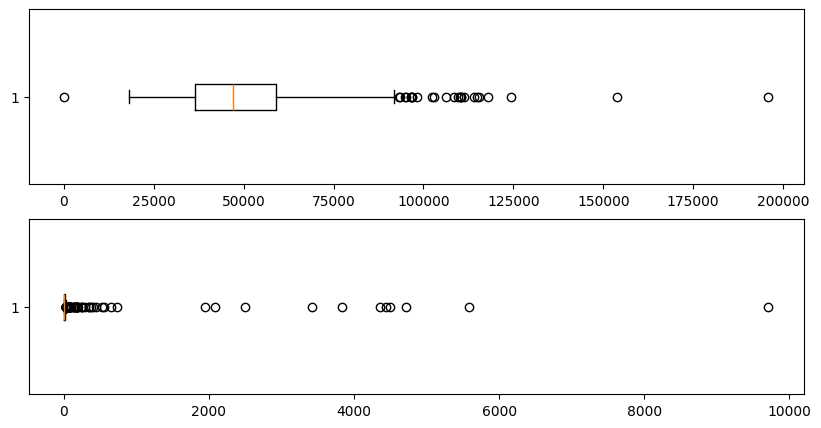

In [298]:
fig, axs = plt.subplots(2,1, figsize=(10, 5)) # 2 rows, 2 columns
axs[0].boxplot(cleanedData['price'],orientation='horizontal')
axs[1].boxplot(cleanedData['mileage'],orientation='horizontal')
plt.show()

In [299]:
# Calculate IQR for the 'price' column
Q1_price = cleanedData['price'].quantile(0.25)
Q3_price = cleanedData['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Calculate IQR for the 'mileage' column
Q1_mileage = cleanedData['mileage'].quantile(0.25)
Q3_mileage = cleanedData['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

# Filter the DataFrame to remove outliers from both columns
cleanedData = cleanedData[
    (cleanedData['price'] >= lower_bound_price) &
    (cleanedData['price'] <= upper_bound_price) &
    (cleanedData['mileage'] >= lower_bound_mileage) &
    (cleanedData['mileage'] <= upper_bound_mileage)
]

After Removing Outliers

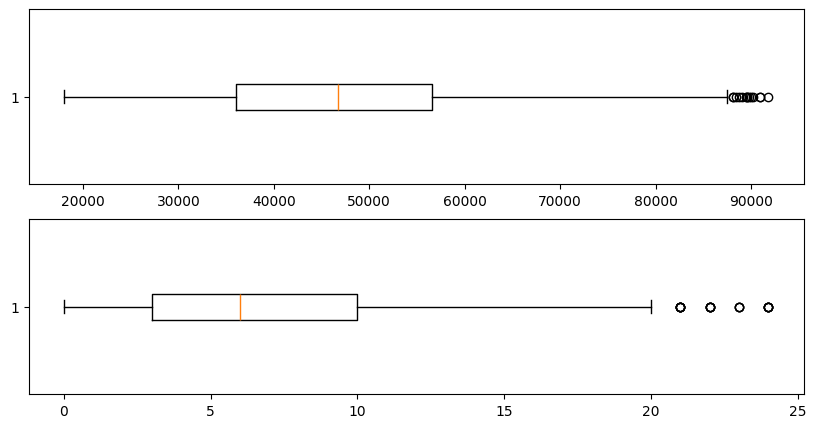

In [300]:
fig, axs = plt.subplots(2,1, figsize=(10, 5)) # 2 rows, 2 columns
axs[0].boxplot(cleanedData['price'],orientation='horizontal')
axs[1].boxplot(cleanedData['mileage'],orientation='horizontal')
plt.show()

Shape now after cleaning the data

In [301]:
shape = cleanedData.shape
print(f"No. of rows: {shape[0]}")
print(f"No. of rows removed: {data.shape[0]-shape[0]}")

No. of rows: 840
No. of rows removed: 162


## EDA

1. Create a Histogram of Price to see the distribution of price

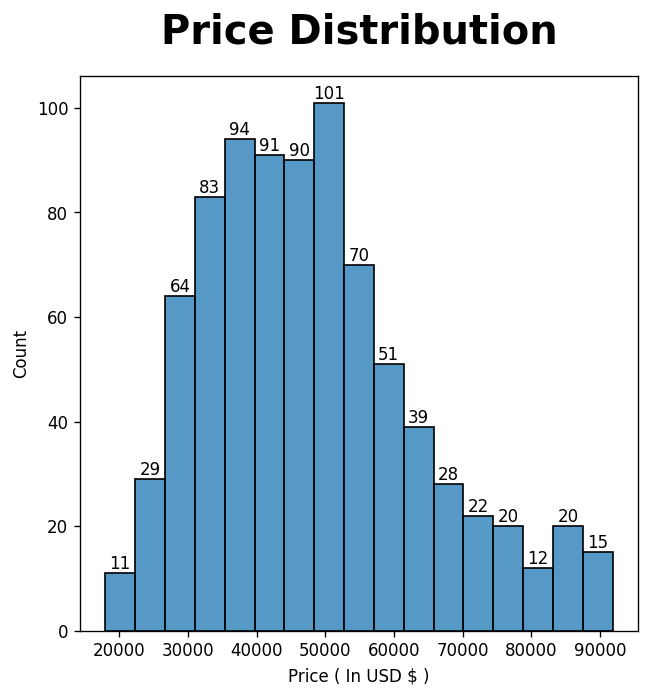

In [302]:
plt.figure(figsize=(6,6),dpi=120)
ax = sns.histplot(cleanedData['price'])
ax.bar_label(ax.containers[0],fontsize = 10)
ax.set_xlabel("Price ( In USD $ )")
ax.set_ylabel("Count")
ax.set_title("Price Distribution",fontdict={'weight':"bold",'size':24},pad=20)
plt.show()

2. We will create a Bar graph of `make` feature to how many cars in total is made by each maker

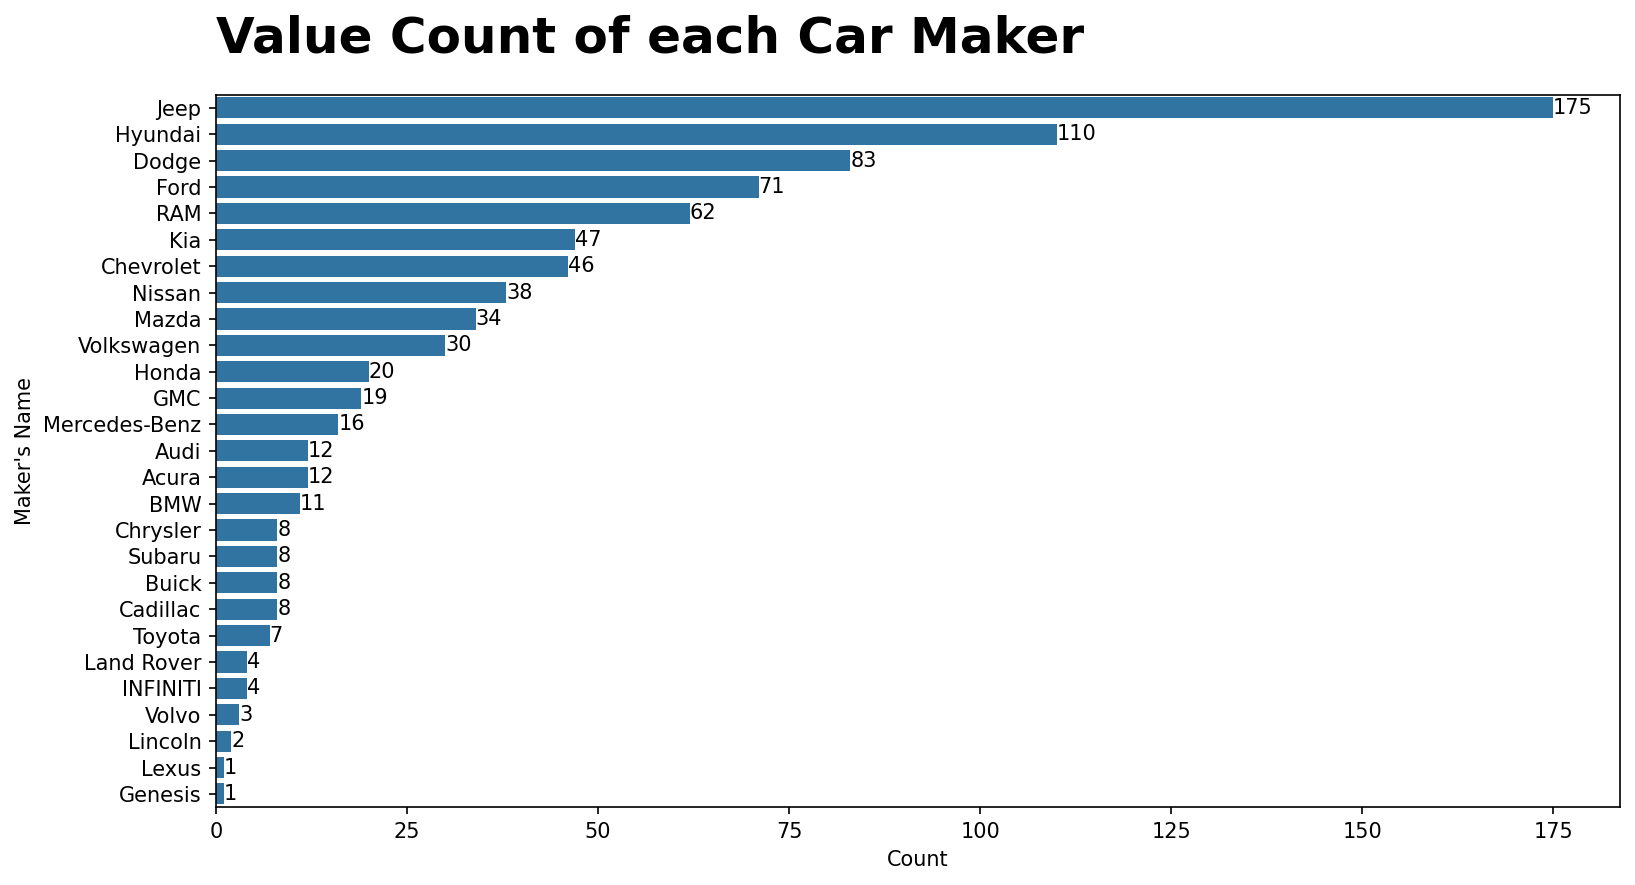

In [303]:
plt.figure(figsize=(11,6),dpi=150)

ax = sns.barplot(data=cleanedData['make'].value_counts(),errorbar=None,estimator="sum",orient="y",width=1,gap=0.2)
ax.bar_label(ax.containers[0],fontsize = 10)
ax.set_xlabel("Count")
ax.set_ylabel("Maker's Name")
ax.set_title("Value Count of each Car Maker",loc="left",fontdict={'weight':"bold",'size':24},pad=20)

plt.tight_layout()
plt.show()

3. Create a Histogram of fuel

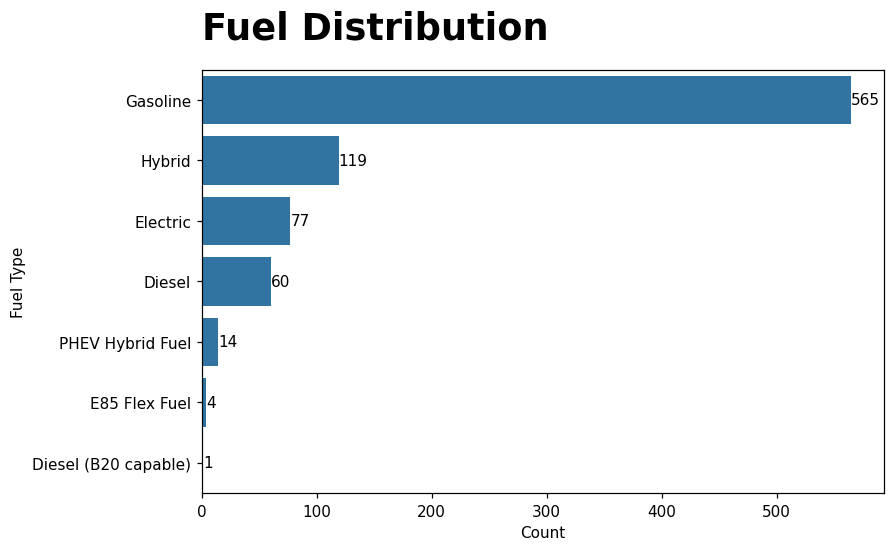

In [304]:
plt.figure(figsize=(8,5),dpi=110)
ax = sns.barplot(cleanedData['fuel'].value_counts(),errorbar=None,orient='y')
ax.bar_label(ax.containers[0],fontsize = 10)
ax.set_xlabel("Count")
ax.set_ylabel("Fuel Type")
ax.set_title("Fuel Distribution",fontdict={'weight':"bold",'size':24},pad=20,loc='left')
plt.show()

4. Create a Bar graph of `Body` do see general body type of all cars

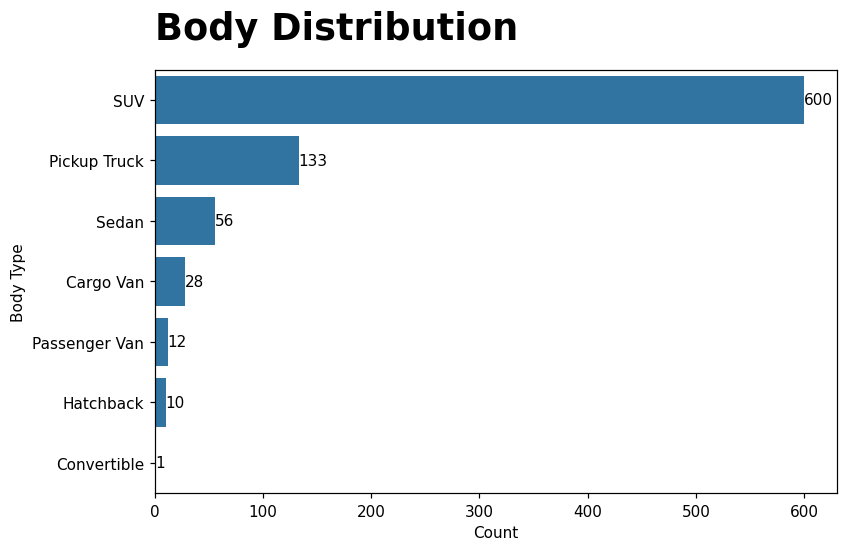

In [305]:
plt.figure(figsize=(8,5),dpi=110)
ax = sns.barplot(cleanedData['body'].value_counts(),errorbar=None,orient='y')
ax.bar_label(ax.containers[0],fontsize = 10)
ax.set_xlabel("Count")
ax.set_ylabel("Body Type")
ax.set_title("Body Distribution",fontdict={'weight':"bold",'size':24},pad=20,loc='left')
plt.show()

5. Create a Bar Graph of `drivetrain`

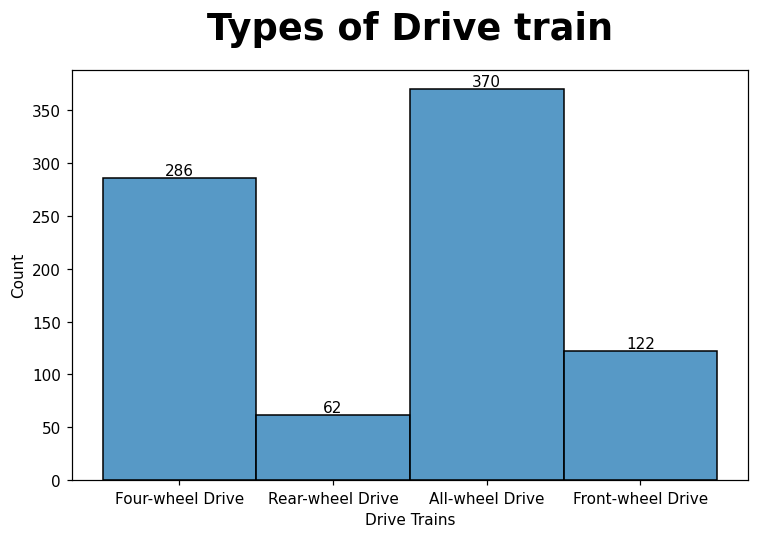

In [306]:
plt.figure(figsize=(7,5),dpi=110)

ax = sns.histplot(cleanedData['drivetrain'])
ax.bar_label(ax.containers[0],fontsize = 10)
ax.tick_params(axis='x')
ax.set_xlabel("Drive Trains")
ax.set_ylabel("Count")
ax.set_title("Types of Drive train",fontdict={'weight':"bold",'size':24},pad=20)
plt.tight_layout()
plt.show()

6. Create a scatter plot where x axis makers name in ascending order of price and y axis show price ( The idea to show how much each company spend )

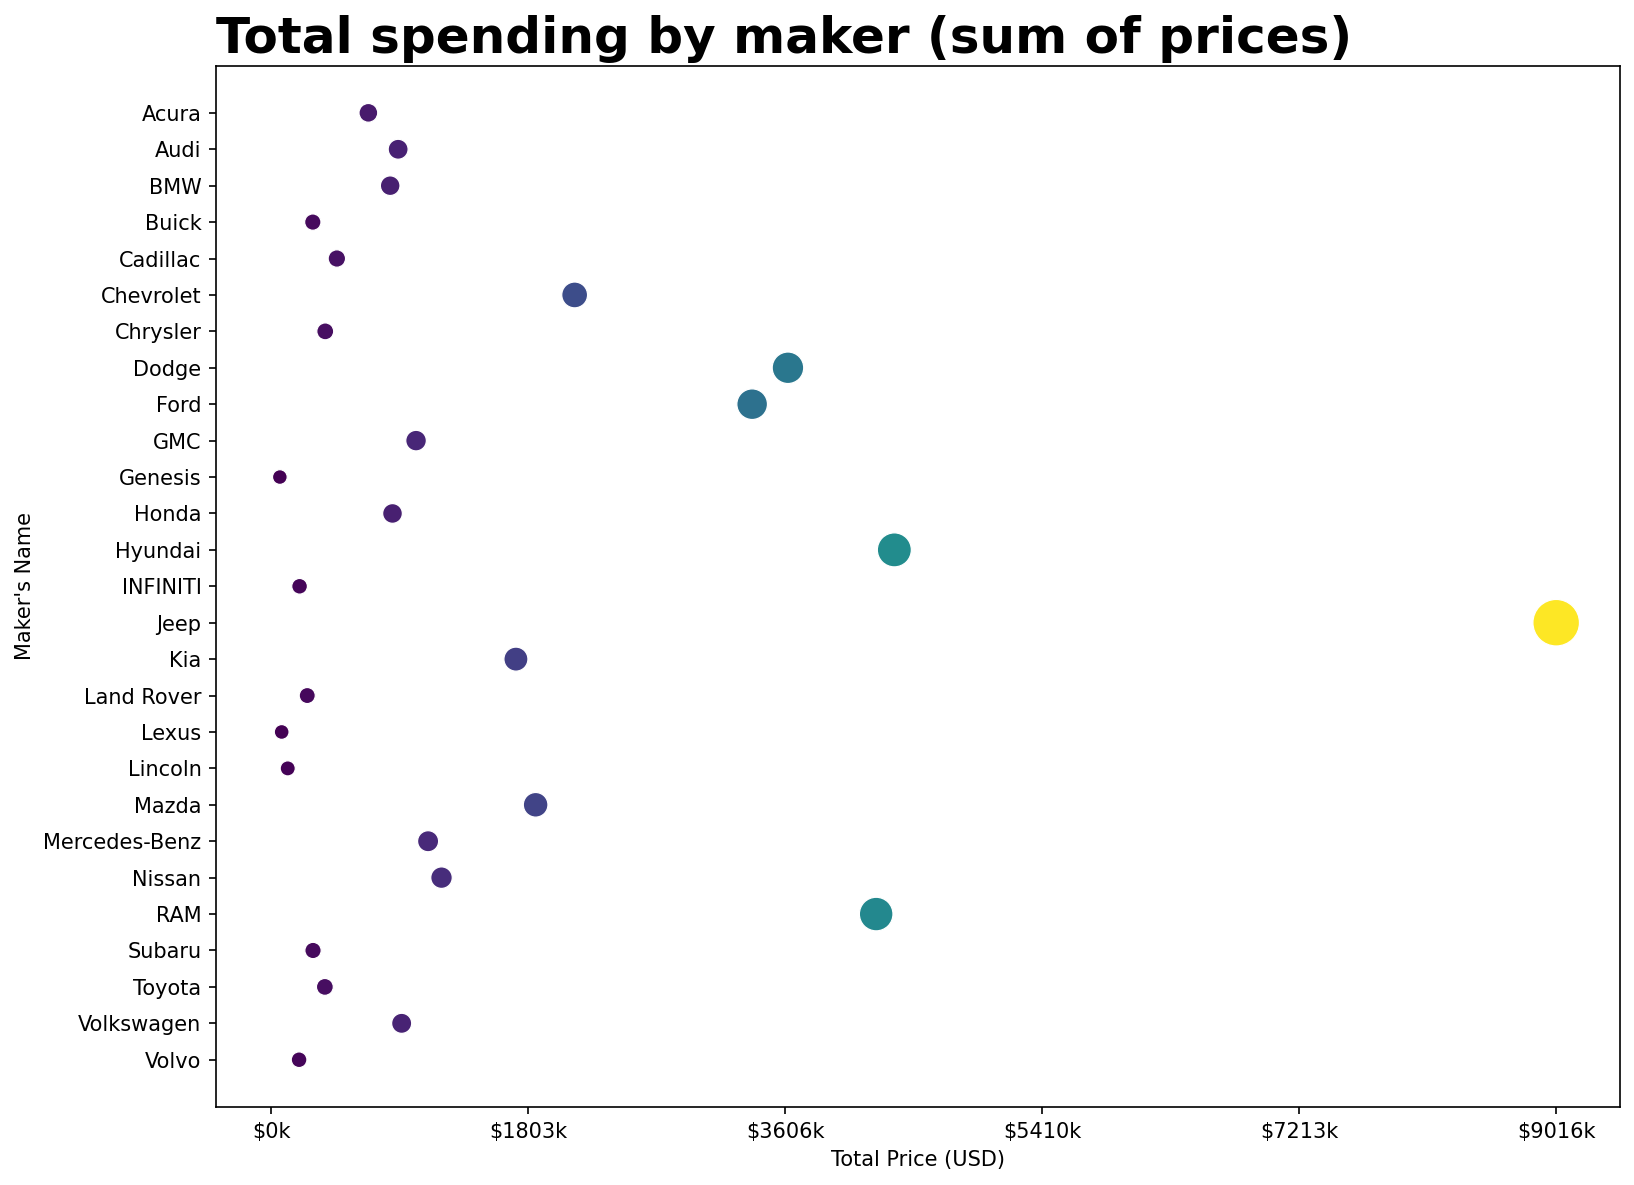

In [307]:
import matplotlib.ticker as ticker

make_price = cleanedData.groupby('make', as_index=False)['price'].sum()
make_price
plt.figure(figsize=(11,8), dpi=150)
ax = sns.scatterplot(
    data=make_price,
    x='price',
    y='make',
    size='price',
    hue='price',
    sizes=(50, 500),
    palette='viridis',
    legend=False
)

max_price = make_price['price'].max()
ticks = np.linspace(0, max_price, 6)
ax.set_xticks(ticks)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}k'))

ax.set_xlabel('Total Price (USD)')
ax.set_ylabel("Maker's Name")
ax.set_title("Total spending by maker (sum of prices)", loc='left', fontdict={'weight':'bold','size':24})
plt.tight_layout()
plt.show()

## Feature Engineering

1. Make a Prediction data for Feature Engineering and Model training

In [308]:
predictionData = cleanedData[['make', 'model', 'year', 'price', 'engine', 'cylinders', 'fuel', 'mileage','transmission', 'trim', 'body', 'doors', 'drivetrain']].copy()

In [309]:
predictionData.head()

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,drivetrain
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,Four-wheel Drive
1,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Four-wheel Drive
4,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Four-wheel Drive
6,Jeep,Wagoneer,2024,63862.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Rear-wheel Drive
7,Ford,F-350,2024,89978.0,32V DDI OHV Turbo Diesel,8.0,Diesel,15.0,10-Speed Automatic,Lariat Super Duty,Pickup Truck,4.0,Four-wheel Drive


2. Engine Feature Extraction

In [310]:
# --- Feature Engineering from 'engine' column ---
predictionData['engine_liters'] = predictionData['engine'].str.extract(r'(\d\.?\d*)L', flags=re.IGNORECASE).astype(float)
predictionData['is_turbo'] = predictionData['engine'].str.contains('Turbo', case=False, na=False).astype(int)
predictionData['is_hybrid'] = predictionData['engine'].str.contains('Hybrid', case=False, na=False).astype(int)
predictionData['valve_count'] = predictionData['engine'].str.extract(r'(\d{1,2})V', flags=re.IGNORECASE).astype(float)


# --- Handle Missing Values in New Columns (Warning-Free Method) ---
# Reassign the column instead of using inplace=True
median_liters = predictionData['engine_liters'].median()
predictionData['engine_liters'] = predictionData['engine_liters'].fillna(median_liters)

median_valves = predictionData['valve_count'].median()
predictionData['valve_count'] = predictionData['valve_count'].fillna(median_valves)

# This syntax is also fine for the binary flags
predictionData['is_turbo'] = predictionData['is_turbo'].fillna(0)
predictionData['is_hybrid'] = predictionData['is_hybrid'].fillna(0)


# --- Clean Up ---
# Drop the original 'engine' column as it's no longer needed
predictionData.drop('engine', axis=1, inplace=True)

print("New engineered features:")
print(predictionData[['engine_liters', 'is_turbo', 'is_hybrid', 'valve_count']].head())

New engineered features created without warnings:
   engine_liters  is_turbo  is_hybrid  valve_count
0            3.6         1          0         24.0
1            3.6         0          0         16.0
4            3.6         1          0         24.0
6            3.6         1          0         24.0
7            3.6         1          0         32.0


3. Trim Feature Extraction

In [319]:
# --- Feature Engineering for 'trim' ---

# Calculate how many times each trim appears
trim_counts = predictionData['trim'].value_counts()

# Identify trims that appear less than, say, 5 times
rare_trims = trim_counts[trim_counts < 5].index

# Replace these rare trims with the category 'Other'
predictionData['trim_cleaned'] = predictionData['trim'].replace(rare_trims, 'Other')

# Drop the original trim column
predictionData.drop('trim', axis=1, inplace=True)

4. Feature extraction of Model

In [323]:
# --- Feature Engineering for 'model' ---

# Calculate how many times each model appears
model_counts = predictionData['model'].value_counts()

# Identify models that appear less than, say, 10 times
rare_models = model_counts[model_counts < 10].index

# Replace these rare models with the category 'Other'
predictionData['model_cleaned'] = predictionData['model'].replace(rare_models, 'Other')

# Now you can one-hot encode 'model_cleaned' instead of the original 'model'
# Don't forget to drop the original 'model' column
predictionData.drop('model', axis=1, inplace=True)

5. Feature Extraction of transmission

In [324]:
# --- Improved Feature Engineering for 'transmission' ---

# 1. Extract the number of speeds (gears) - This part remains the same.
predictionData['gears'] = predictionData['transmission'].str.extract(r'(\d{1,2})-Speed', flags=re.IGNORECASE).astype(float)

# 2. Create a categorical 'transmission_type' column
# Define conditions for each transmission type. Order is important: check for CVT first.
conditions = [
    predictionData['transmission'].str.contains('CVT', case=False, na=False),
    predictionData['transmission'].str.contains('Automatic', case=False, na=False)
]

# Define the values to assign for each condition
choices = ['CVT', 'Automatic']

# Create the new column using np.select
# If a value is neither CVT nor Automatic, it will be labeled 'Other'
predictionData['transmission_type'] = np.select(conditions, choices, default='Other')


# --- Handle Missing Values and Clean Up ---

# Fill any missing gear counts with the median
predictionData['gears'] = predictionData['gears'].fillna(predictionData['gears'].median())

# Drop the original transmission column
predictionData.drop('transmission', axis=1, inplace=True)

# Now, one-hot encode the new 'transmission_type' column along with your other categoricals.

print("Improved transmission features:")
print(predictionData[['gears', 'transmission_type']].head())

Improved transmission features:
   gears transmission_type
0    8.0         Automatic
1    8.0         Automatic
4    6.0         Automatic
6    8.0         Automatic
7   10.0         Automatic


6. Add an Age feauture which shows the age of a car

In [311]:
# Example
current_year = 2024 
predictionData.loc[:,'age'] = current_year - predictionData['year']

7. Perform Feature Encoding on make, fuel, body, drive train

In [327]:
# Assume 'predictionData' is your DataFrame after feature engineering
encodedData = predictionData.copy()

# List of all columns you want to encode
categorical_cols = [
    'make', 'fuel', 'body', 'drivetrain', 
    'model_cleaned', 'trim_cleaned', 'transmission_type'
]

# Loop through the columns and apply the encoder
for col in categorical_cols:
    le = LabelEncoder()
    encodedData[col] = le.fit_transform(encodedData[col])

print("Data after Label Encoding:")
print(encodedData.head())

Data after Label Encoding:
   make  year    price  cylinders  fuel  mileage  body  doors  drivetrain  \
0    14  2024  74600.0        6.0     4     10.0     5    4.0           1   
1    14  2024  50170.0        6.0     4      1.0     5    4.0           1   
4    22  2024  81663.0        6.0     0     10.0     4    4.0           1   
6    14  2024  63862.0        6.0     4      5.0     5    4.0           3   
7     8  2024  89978.0        8.0     0     15.0     4    4.0           1   

   engine_liters  is_turbo  is_hybrid  valve_count  age  trim_cleaned  \
0            3.6         1          0         24.0    0            44   
1            3.6         0          0         16.0    0            20   
4            3.6         1          0         24.0    0            18   
6            3.6         1          0         24.0    0             7   
7            3.6         1          0         32.0    0            25   

   model_cleaned  gears  transmission_type  
0             23    8.0   

## Data Preprocessing

### Train and Test Data

In [329]:
X = encodedData.drop(['price'],axis=1)
y = encodedData['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,train_size=0.8,test_size=0.2)

### Data Scaling

In [330]:
scaler = StandardScaler()

# 1. Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# 2. Use the SAME scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)

## Model Selection and Evaluation

For this project we are going to use Linear Regression

In [353]:
linearModel = LinearRegression()

linearModel.fit(X_train_scaled_df,y_train)

prediction = linearModel.predict(X_test_scaled_df)

mae = mean_absolute_error(y_test, prediction)
rmse = np.sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R-squared: {r2:.4f}")

MAE: $10,151.26
RMSE: $12,804.19
R-squared: 0.2889


In [341]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X_train_scaled, y_train)

tunedregressor = RandomForestRegressor(n_estimators=300, max_features=0.24,random_state=0, oob_score=True)
tunedregressor.fit(X_train_scaled, y_train)

C:\Users\Shaurya Srivastava\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
C:\Users\Shaurya Srivastava\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Shaurya Srivastava\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.24
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [333]:
predictions = regressor.predict(X_test_scaled)

oob_score = regressor.oob_score_
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f'Out-of-Bag Score: {oob_score}')
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R-squared: {r2:.4f}")

Out-of-Bag Score: 0.7102655005935559
MAE: $4,246.58
RMSE: $6,765.76
R-squared: 0.8014


In [342]:
predictions = tunedregressor.predict(X_test_scaled)

oob_score = tunedregressor.oob_score_
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f'Out-of-Bag Score: {oob_score}')
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R-squared: {r2:.4f}")

Out-of-Bag Score: 0.8529480528464308
MAE: $3,919.60
RMSE: $6,353.10
R-squared: 0.8249


In [343]:
sample = X_test.iloc[0:1]
 
samplePrice = y_test.iloc[0:1]
prediction = tunedregressor.predict(scaler.transform(sample))

sample_dict = sample.iloc[0].to_dict()

print(f"\nSample Data: {sample_dict}")
print(f"Predicted Price: {prediction[0]}\nActual Price: {samplePrice.values[0]}")


Sample Data: {'make': 14.0, 'year': 2024.0, 'cylinders': 4.0, 'fuel': 5.0, 'mileage': 5.0, 'body': 5.0, 'doors': 4.0, 'drivetrain': 1.0, 'engine_liters': 3.6, 'is_turbo': 1.0, 'is_hybrid': 1.0, 'valve_count': 16.0, 'age': 0.0, 'trim_cleaned': 45.0, 'model_cleaned': 25.0, 'gears': 8.0, 'transmission_type': 0.0}
Predicted Price: 51541.73333333333
Actual Price: 50755.0


If we add 3000$ in the predicted price it will match the price of actual price

### Hyper parameter tuning for Randome Forest Regressor

Only to be used when regressor is not runned

In [336]:
# # Define the search space for continuous hyperparameters
# # For example, 'n_estimators' (integer) and 'max_features' (continuous)
# param_distributions = {
#     'n_estimators': [100, 200, 300],
#     'max_features': uniform(0.1, 0.9) # Continuous range from 0.1 to 1.0 (0.1 + 0.9)
# }

# # Perform Randomized Search
# random_search = RandomizedSearchCV(
#     estimator=regressor,
#     param_distributions=param_distributions,
#     n_iter=50, # Number of random combinations to try
#     cv=5,       # 5-fold cross-validation
#     scoring='neg_mean_squared_error', # Metric for evaluation
#     random_state=42
# )

# # Fit the search to your data
# random_search.fit(X_train_scaled, y_train)

# # Get the best hyperparameters
# best_params = random_search.best_params_
# best_params

C:\Users\Shaurya Srivastava\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
C:\Users\Shaurya Srivastava\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
C:\Users\Shaurya Srivastava\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
C:\Users\Shaurya Srivastava\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y)
C:\Users\Shaurya Srivastava\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_forest.

{'max_features': np.float64(0.2403950683025824), 'n_estimators': 300}